In [ ]:
!pip install sentinelsat
!pip install rasterio

     |████████████████████████████████| 48 kB 2.4 MB/s 
     |████████████████████████████████| 19.3 MB 3.6 MB/s 


In [ ]:
# Bibliotecas
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import rasterio 
from rasterio import plot

In [ ]:
api = SentinelAPI('usuario', 'senha', 'https://apihub.copernicus.eu/apihub')

# Pesquisando com .geojson
footprint = geojson_to_wkt(read_geojson('centroide.geojson'))
products = api.query(footprint,
                     date=('20200710', date(2020, 7, 30)),
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 30),
                     limit=2)

In [ ]:
# Convertendo a consulta em Pandas dataframe
products_df = api.to_dataframe(products)


# Ordenando por cobertura de nuvens e data
products_df_sorted = products_df.sort_values(['cloudcoverpercentage', 'ingestiondate'], ascending=[True, True])
products_df_sorted = products_df_sorted.head(5)
products_df_sorted.head()

,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,cloudcoverpercentage,sensoroperationalmode,gmlfootprint,footprint,level1cpdiidentifier,tileid,hv_order_tileid,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,granuleidentifier,datastripidentifier,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage
fa70fc5a-83dd-41a7-b311-6e8778776157,S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-07-26T13:32:29.024Z, Instrument: MS...",false,2020-07-26 13:32:29.024,2020-07-26 13:32:29.024,2020-07-26 13:32:29.024,2020-07-27 03:26:52.277,17696,81,0.008000,INS-NOBS,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-48.19223 -16.35052940078879, ...",S2B_OPER_MSI_L1C_TL_VGS2_20200726T152123_A0176...,22LHH,LH22H,SAFE,02.09,Sentinel-2,S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_2...,Multi-Spectral Instrument,MSI,437.17 MB,GS2B_20200726T133229_017696_N02.09,S2MSI1C,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_2...,fa70fc5a-83dd-41a7-b311-6e8778776157,S2B_OPER_MSI_L1C_TL_VGS2_20200726T152123_A0176...,S2B_OPER_MSI_L1C_DS_VGS2_20200726T152123_S2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bfe2d7ef-1cde-40d3-97e1-36624031fc11,S2B_MSIL2A_20200726T133229_N0214_R081_T22LHH_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-07-26T13:32:29.024Z, Instrument: MS...",false,NaT,2020-07-26 13:32:29.024,2020-07-26 13:32:29.024,2020-07-26 21:43:20.305,17696,81,1.026457,NaN,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-48.19223 -16.35052940078879, ...",S2B_OPER_MSI_L1C_TL_VGS2_20200726T152123_A0176...,NaN,NaN,SAFE,02.14,Sentinel-2,S2B_MSIL2A_20200726T133229_N0214_R081_T22LHH_2...,Multi-Spectral Instrument,MSI,631.15 MB,GS2B_20200726T133229_017696_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200726T133229_N0214_R081_T22LHH_2...,bfe2d7ef-1cde-40d3-97e1-36624031fc11,NaN,NaN,51.29804,45.643693,1.019431,0.157436,0.058214,0.066019,0.0


In [ ]:
# Baixando imagens
api.download_all(products_df_sorted.index)

MD5 checksumming:   0%|          | 0.00/458M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/662M [00:00<?, ?B/s]

ResultTuple(downloaded={'fa70fc5a-83dd-41a7-b311-6e8778776157': {'id': 'fa70fc5a-83dd-41a7-b311-6e8778776157', 'title': 'S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123', 'size': 458452562, 'md5': '0884eb5f80ddb63d9bf66e5ad1b0d7be', 'date': datetime.datetime(2020, 7, 26, 13, 32, 29, 24000), 'footprint': 'POLYGON((-47.572388 -15.349673729509432,-47.594116 -15.446370257398938,-47.627502 -15.594565453350478,-47.660706 -15.742771543743668,-47.69406 -15.890978314753204,-47.727478 -16.039333134881606,-47.760864 -16.187753162965222,-47.794098 -16.33622189180726,-47.795868 -16.34428079830827,-48.19223 -16.35052940078879,-48.205933 -15.359071662962307,-47.572388 -15.349673729509432))', 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('fa70fc5a-83dd-41a7-b311-6e8778776157')/$value", 'Online': True, 'Creation Date': datetime.datetime(2020, 7, 27, 3, 28, 7, 283000), 'Ingestion Date': datetime.datetime(2020, 7, 27, 3, 26, 52, 277000), 'quicklook_url': "https://apihub.coper

In [ ]:
# Desempacotando arquivo 
!unzip /content/S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.zip

Archive:  /content/S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.zip
   creating: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/
 extracting: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/INSPIRE.xml  
   creating: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/rep_info/
 extracting: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/rep_info/S2_User_Product_Level-1C_Metadata.xsd  
   creating: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/HTML/
 extracting: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/HTML/star_bg.jpg  
 extracting: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/HTML/banner_1.png  
 extracting: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/HTML/banner_2.png  
 extracting: S2B_MSIL1C_20200726T133229_N0209_R081_T22LHH_20200726T152123.SAFE/HTML/UserProduct_index.html  
 extracting: S2B_MSIL1C_20200726T133

In [ ]:
# Lendo e visualizando banda 04
B4 = rasterio.open('/T22LHH_20200726T133229_B04.jp2')
arr = B4.read(1)
plot.show(arr[1000:5000,600:4000], cmap='Greys_r')

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [686.0, 1380.0]
    G: [686.0, 1380.0]
    B: [686.0, 1380.0]

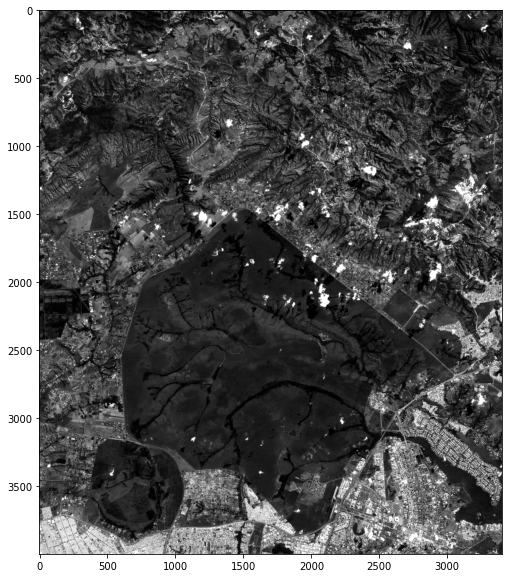

In [ ]:
from spectral import imshow
imshow(arr[1000:5000,600:4000], stretch=(0.02))